In [2]:
# import matplotlib
import numpy as np
import pandas as pd
from matplotlib.patches import ConnectionPatch
import matplotlib.pyplot as plt
from scipy.interpolate import make_interp_spline

In [65]:
def multi_cept(index_list, x_pt):
    try:
        newid = index_list[0]
        diff_p = abs(newid - x_pt)
        if len(index_list) > 1:
            for _ in index_list:
                diff_n = abs(_ - x_pt)
                if diff_n  <  diff_p :
                    newid = _
                    diff_p = diff_n
        return newid
    except TypeError:
        return index_list

In [8]:
df = pd.read_excel('data/finished plan data.xlsx')
df_t = pd.read_excel('data/result of sea trial.xlsx')
connector_color = 'magenta'
lwidth = 2
marker_size = 100

In [4]:
def smoothing(x, y):
    
    X_Y_Spline = make_interp_spline(x, y)
    X_ = np.linspace(x.min(), x.max(), 500)
    Y_ = X_Y_Spline(X_)
    
    return X_, Y_

**Smoothing**

In [5]:
x0 = df['Engine Output (%)']
Te1_ = df['Te1']
x, Te1 = smoothing(x0, Te1_)

Tc_ = df['Tc']
_, Tc = smoothing(x0, Tc_)

Te2_ = df['Te2']
_, Te2 = smoothing(x0, Te2_)

Ps_ = df['Ps']
_, Ps = smoothing(x0, Ps_)

Pm_ = df['Pm']
_, Pm = smoothing(x0, Pm_)

Pc_ = df['Pc']
_, Pc = smoothing(x0, Pc_)

Ne_ = df['Ne']
_, Ne = smoothing(x0, Ne_)

Nb_ = df['Nb']
_, Nb = smoothing(x0, Nb_)

Be_ = df['Be']
_, Be = smoothing(x0, Be_)

Rc_ = df['Rc']
_, Rc = smoothing(x0, Rc_)

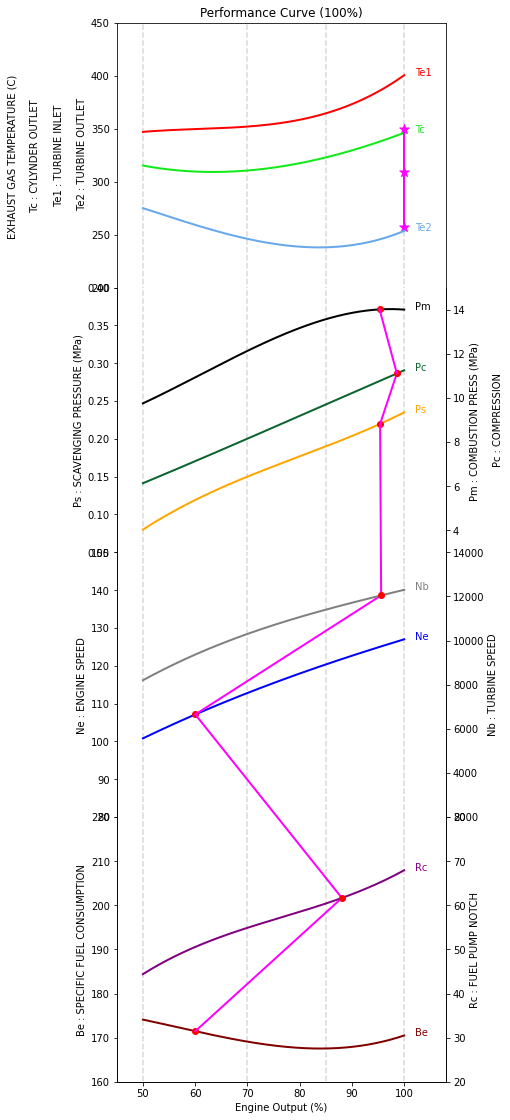

In [124]:
x_pt = 100
fig, ax = plt.subplots(4, 1, figsize=(5,15), gridspec_kw=dict(hspace=0))
fig.tight_layout(pad=0)

ax1t = ax[1].twinx()
ax2t = ax[2].twinx()
ax3t = ax[3].twinx()
ax_t = {1 : (1, ax1t), 2 : (2, ax2t), 3: (3, ax3t)}

# ======================================= GARIS LAYOUT PUTUS-PUTUS

ax[0].plot([50, 50], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[1].plot([50, 50], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[2].plot([50, 50], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[3].plot([50, 50], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[0].plot([70, 70], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[1].plot([70, 70], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[2].plot([70, 70], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[3].plot([70, 70], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[0].plot([85, 85], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[1].plot([85, 85], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[2].plot([85, 85], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[3].plot([85, 85], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[0].plot([100, 100], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[1].plot([100, 100], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[2].plot([100, 100], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')
ax[3].plot([100, 100], [0, 500], linestyle='dashed', alpha = 0.3, color = 'grey')


ax[0].set_title('Performance Curve ({}%)'.format(x_pt))
ax[3].set_xlabel('Engine Output (%)')

# ====================================== Frame/ spines visibility
ax[0].spines.bottom.set_visible(False)
ax[1].spines.top.set_visible(False)
ax[1].spines.bottom.set_visible(False)
ax1t.spines.top.set_visible(False)
ax1t.spines.bottom.set_visible(False)
ax[2].spines.top.set_visible(False)
ax[2].spines.bottom.set_visible(False)
ax2t.spines.top.set_visible(False)
ax2t.spines.bottom.set_visible(False)
ax[3].spines.top.set_visible(False)
ax3t.spines.top.set_visible(False)
    
# ================== LINES
ax[0].plot(x, Te1,
           label = 'Te1',
           linewidth = lwidth,
           color = '#ff0000')
ax[0].plot(x, Tc,
           label = 'Tc',
           linewidth = lwidth,
           color = '#10eb18')
ax[0].plot(x,  Te2,
           label = 'Te2',
           linewidth = lwidth,
           color = '#67a7eb')
ax[1].plot(x, Ps,
           label = 'Ps',
           linewidth = lwidth,
           color='orange')
ax1t.plot(x, Pc,
          label = 'Pc',
          linewidth = lwidth,
          color = '#0b632e')
ax1t.plot(x, Pm,
          label = 'Pm',
          linewidth = lwidth,
          color = 'black')
ax[2].plot(x, Ne,
           label = 'Ne',
           linewidth = lwidth,
           color = 'blue')
ax2t.plot(x, Nb,
          label = 'Nb',
          linewidth = lwidth,
          color = 'grey')
ax[3].plot(x, Be,
           label = 'Be',
           linewidth = lwidth,
           color = 'maroon')
ax3t.plot(x, Rc,
          label = 'Rc',
          linewidth = lwidth,
          color = 'purple')

ax[0].set_ylim([200, 450])
ax[1].set_ylim([0.05, 0.4])
ax1t.set_ylim([3, 15])
ax[2].set_ylim([80, 150])
ax2t.set_ylim([2000, 14000])
ax[3].set_ylim([160, 220])
ax3t.set_ylim([20, 80])
ax[0].set_xlim([45, 108])
ax[1].set_xlim([45, 108])
ax1t.set_xlim([45, 108])
ax[2].set_xlim([45, 108])
ax2t.set_xlim([45, 108])
ax[3].set_xlim([45, 108])
ax3t.set_xlim([45, 108])


# ======================================= LEGENDS
# ax[0].legend(frameon = False)
# ax[1].legend(loc =(0.02, 0.75), frameon = False)
# ax1t.legend(loc = 'upper left', frameon = False)
# ax[2].legend(loc = (0.02, 0.78), frameon = False)
# ax2t.legend(loc = 'upper left', frameon = False)
# ax[3].legend(loc = (0.02, 0.8), frameon = False)
# ax3t.legend(loc = 'upper left', frameon = False)

# ======================================= Y-AXIS LABELS
ax[0].set_ylabel("""EXHAUST GAS TEMPERATURE (C) \n 
 Tc : CYLYNDER OUTLET \n
 Te1 : TURBINE INLET \n
 Te2 : TURBINE OUTLET""")
ax[1].set_ylabel('Ps : SCAVENGING PRESSURE (MPa)')
ax1t.set_ylabel("""Pm : COMBUSTION PRESS (MPa) \n
Pc : COMPRESSION""")
ax[2].set_ylabel('Ne : ENGINE SPEED')
ax2t.set_ylabel('Nb : TURBINE SPEED')
ax[3].set_ylabel('Be : SPECIFIC FUEL CONSUMPTION')
ax3t.set_ylabel('Rc : FUEL PUMP NOTCH')

# ====================================== FIND INTERSECTIONS

Te1_idx = np.argwhere(np.diff(np.sign(Te1 - [float(df_t[df['Engine Output (%)'] == x_pt]['Te1']) for i in range (len(Te1))]))).flatten()
Te2_idx = np.argwhere(np.diff(np.sign(Te2 - [float(df_t[df['Engine Output (%)'] == x_pt]['Te2']) for i in range (len(Te2))]))).flatten()
Tc_idx = np.argwhere(np.diff(np.sign(Tc - [float(df_t[df['Engine Output (%)'] == x_pt]['Tc']) for i in range (len(Tc))]))).flatten()
Ps_idx = np.argwhere(np.diff(np.sign(Ps - [float(df_t[df['Engine Output (%)'] == x_pt]['Ps']) for i in range (len(Ps))]))).flatten()
Pc_idx = np.argwhere(np.diff(np.sign(Pc - [float(df_t[df['Engine Output (%)'] == x_pt]['Pc']) for i in range (len(Pc))]))).flatten()
Pm_idx = np.argwhere(np.diff(np.sign(Pm - [float(df_t[df['Engine Output (%)'] == x_pt]['Pm']) for i in range (len(Pm))]))).flatten()
Ne_idx = np.argwhere(np.diff(np.sign(Ne - [float(df_t[df['Engine Output (%)'] == x_pt]['Ne']) for i in range (len(Ne))]))).flatten()
Nb_idx = np.argwhere(np.diff(np.sign(Nb - [float(df_t[df['Engine Output (%)'] == x_pt]['Nb']) for i in range (len(Nb))]))).flatten()
Rc_idx = np.argwhere(np.diff(np.sign(Rc - [float(df_t[df['Engine Output (%)'] == x_pt]['Rc']) for i in range (len(Rc))]))).flatten()
Be_idx = np.argwhere(np.diff(np.sign(Be - [float(df_t[df['Engine Output (%)'] == x_pt]['Be']) for i in range (len(Be))]))).flatten()

# =================================== Penanganan jika ada nilai yang tidak memiliki x-intersection

Te1_idx_ = Te1_idx if len(Te1_idx) > 0 else x_pt
Te2_idx_ = Te2_idx if len(Te2_idx) > 0 else x_pt
Tc_idx_ = Tc_idx if len(Tc_idx) > 0 else x_pt
Ps_idx_ = Ps_idx if len(Ps_idx) > 0 else x_pt
Pc_idx_ = Pc_idx if len(Pc_idx) > 0 else x_pt
Pm_idx_ = Pm_idx if len(Pm_idx) > 0 else x_pt
Ne_idx_ = Ne_idx if len(Ne_idx) > 0 else x_pt
Nb_idx_ = Nb_idx if len(Nb_idx) > 0 else x_pt
Rc_idx_ = Rc_idx if len(Rc_idx) > 0 else x_pt
Be_idx_ = Be_idx if len(Be_idx) > 0 else x_pt

# ================================== Penanganan jika ada nilai yang memiliki 2 intercept

Te1_idx = multi_cept(Te1_idx_, x_pt)
Te2_idx = multi_cept(Te2_idx_, x_pt)
Tc_idx = multi_cept(Tc_idx_, x_pt)
Ps_idx = multi_cept(Ps_idx_, x_pt)
Pc_idx = multi_cept(Pc_idx_, x_pt)
Pm_idx = multi_cept(Pm_idx_, x_pt)
Ne_idx = multi_cept(Ne_idx_, x_pt)
Nb_idx = multi_cept(Nb_idx_, x_pt)
Rc_idx = multi_cept(Rc_idx_, x_pt)
Be_idx = multi_cept(Be_idx_, x_pt)
        
# ==================================== Scatter Plot Intersection

# ax[0].plot(x[Te1_idx], Te1[Te1_idx], 'ro')
# ax[0].plot(x[Tc_idx], Tc[Tc_idx], 'ro')
# ax[0].plot(x[Te2_idx], Te2[Te2_idx], 'ro')

ax[0].scatter(x_pt, Te1[Te1_idx], marker = '*', color = 'magenta', s = 100)
ax[0].scatter(x_pt, Tc[Tc_idx], marker = '*', color = 'magenta', s = 100)
ax[0].scatter(x_pt, Te2[Te2_idx], marker = '*', color = 'magenta', s = 100)

ax1t.plot(x[Pc_idx], Pc[Pc_idx], 'ro')
ax[1].plot(x[Ps_idx], Ps[Ps_idx], 'ro')
ax1t.plot(x[Pm_idx], Pm[Pm_idx], 'ro')
ax[2].plot(x[Ne_idx], Ne[Ne_idx], 'ro')
ax2t.plot(x[Nb_idx], Nb[Nb_idx], 'ro')
ax[3].plot(x[Be_idx], Be[Be_idx], 'ro')
ax3t.plot(x[Rc_idx], Rc[Rc_idx], 'ro')

# =================================== Menghubungkan titik2

# -------------------------- Koneksi Te1, Tc, & Te2
ax[0].plot([x_pt, x_pt, x_pt], [Te1[Te1_idx], 
            Tc[Tc_idx], Te2[Te2_idx]],
            linewidth = lwidth,
            color = 'magenta')

# -------------------------- Koneksi Pm -> Pc
ax1t.plot([x[Pm_idx], x[Pc_idx]], [Pm[Pm_idx], Pc[Pc_idx]],
            linewidth = lwidth,
            color = 'magenta')

# -------------------------- Koneksi Pc -> Ps
Pc_Ps = ConnectionPatch(xyA=(x[Pc_idx], Pc[Pc_idx]), 
                        xyB=(x[Ps_idx], Ps[Ps_idx]), 
                        coordsA="data", 
                        coordsB="data", 
                        axesA = ax1t, 
                        axesB = ax[1], 
                        linewidth = lwidth,
                        color = connector_color )
ax1t.add_artist(Pc_Ps)

# -------------------------- Koneksi Ps -> Nb
Ps_Nb = ConnectionPatch(xyA=(x[Ps_idx], Ps[Ps_idx]), 
                        xyB=(x[Nb_idx], Nb[Nb_idx]), 
                        coordsA="data", 
                        coordsB="data", 
                        axesA = ax[1], 
                        axesB = ax2t, 
                        linewidth = lwidth,
                        color = connector_color )
ax2t.add_artist(Ps_Nb)

# -------------------------- Koneksi Nb -> Ne
Nb_Ne = ConnectionPatch(xyA=(x[Nb_idx], Nb[Nb_idx]), 
                        xyB=(x[Ne_idx], Ne[Ne_idx]), 
                        coordsA="data", 
                        coordsB="data", 
                        axesA = ax2t, 
                        axesB = ax[2], 
                        linewidth = lwidth,
                        color = connector_color )
ax2t.add_artist(Nb_Ne)

# -------------------------- Koneksi Ne -> Rc
Ne_Rc = ConnectionPatch(xyA=(x[Ne_idx], Ne[Ne_idx]), 
                        xyB=(x[Rc_idx], Rc[Rc_idx]), 
                        coordsA="data", 
                        coordsB="data", 
                        axesA = ax[2], 
                        axesB = ax3t, 
                        linewidth = lwidth,
                        color = connector_color )
ax3t.add_artist(Ne_Rc)

# -------------------------- Koneksi Rc -> Be
Rc_Be = ConnectionPatch(xyA=(x[Rc_idx], Rc[Rc_idx]), 
                        xyB=(x[Be_idx], Be[Be_idx]), 
                        coordsA="data", 
                        coordsB="data", 
                        axesA = ax3t, 
                        axesB = ax[3], 
                        linewidth = lwidth,
                        color = connector_color )
ax3t.add_artist(Rc_Be)

# ========================= ANOTATED LEGEND
ax[0].annotate('Te1',
  xy     = (     x[-1], Te1[-1]),
  xytext = (1.02*x[-1], Te1[-1]),
  color  = '#ff0000',
)
ax[0].annotate('Tc',
  xy     = (     x[-1], Tc[-1]),
  xytext = (1.02*x[-1], Tc[-1]),
  color  = '#10eb18',
)
ax[0].annotate('Te2',
  xy     = (     x[-1], Te2[-1]),
  xytext = (1.02*x[-1], Te2[-1]),
  color  = '#67a7eb',
)
ax[1].annotate('Ps',
  xy     = (     x[-1], Ps[-1]),
  xytext = (1.02*x[-1], Ps[-1]),
  color  = 'orange',
)
ax1t.annotate('Pc',
  xy     = (     x[-1], Pc[-1]),
  xytext = (1.02*x[-1], Pc[-1]),
  color  = '#0b632e',
)
ax1t.annotate('Pm',
  xy     = (     x[-1], Pm[-1]),
  xytext = (1.02*x[-1], Pm[-1]),
  color  = 'black',
)
ax[2].annotate('Ne',
  xy     = (     x[-1], Ne[-1]),
  xytext = (1.02*x[-1], Ne[-1]),
  color  = 'blue',
)
ax2t.annotate('Nb',
  xy     = (     x[-1], Nb[-1]),
  xytext = (1.02*x[-1], Nb[-1]),
  color  = 'grey',
)
ax[3].annotate('Be',
  xy     = (     x[-1], Be[-1]),
  xytext = (1.02*x[-1], Be[-1]),
  color  = 'maroon',
)
ax3t.annotate('Rc',
  xy     = (     x[-1], Rc[-1]),
  xytext = (1.02*x[-1], Rc[-1]),
  color  = 'purple',
)





plt.show()

In [125]:
fig.savefig('outputs/Curve({}).png'.format(x_pt), bbox_inches="tight")